<a href="https://colab.research.google.com/github/meysamini/Hello-World/blob/master/Medical_Insurance_Charge_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pranav385/Medical-Insurance-charge-Prediction-MLR/refs/heads/main/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Pre-Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


### Underweight: Less than 18.5
### Healthy weight: 18.5 to less than 25
### Overweight: 25 to less than 30
### Obesity: 30 or greater
### Class 1 obesity: 30 to less than 35
### Class 2 obesity: 35 to less than 40
### Class 3 obesity (severe obesity): 40 or greater

In [ ]:
def func(x):
    if x<18.5:
        return 'Underweight'
    elif x>=18.5 and x<25:
        return 'Healthy'
    elif x>=25 and x<30:
        return 'Overweight'
    elif x>=30:
        return 'Obesity'

In [ ]:
data['BMI Range'] = data['bmi'].apply(func)
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight
1,18,male,33.77,1,no,southeast,1725.5523,Obesity


In [ ]:
data['child'] = np.where(data['children']>0, 'Yes', 'No')
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
data.select_dtypes(include=['number']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

### A box plot is an excellent tool for identifying outliers in a dataset. It visually highlights the spread of the data and provides a clear indication of any values that fall outside the typical range.

In [ ]:
for i in data.select_dtypes(include=['number']).columns:
    print(i)
    fig = px.box(x=data[i])
    fig.show()

age


bmi


children


charges


<Axes: xlabel='age', ylabel='Density'>

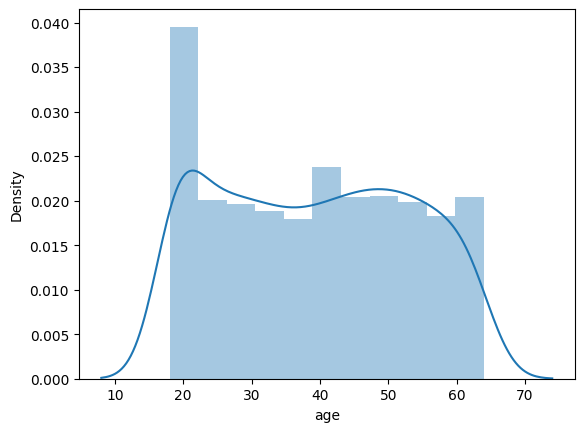

In [ ]:
sns.distplot(data['age'])

In [ ]:
data['age'].skew() # normally distributed

0.054780773126998195

<Axes: xlabel='charges', ylabel='Density'>

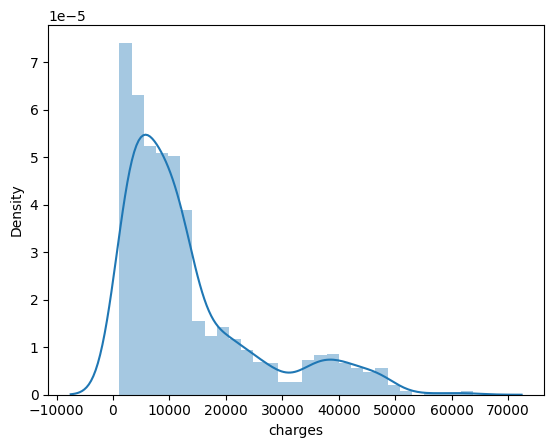

In [ ]:
sns.distplot(data['charges'])

In [ ]:
data['charges'].skew() # rightly skewed

1.5153909108403483

### BMI column have outlier so we treat them

<Axes: xlabel='bmi', ylabel='Density'>

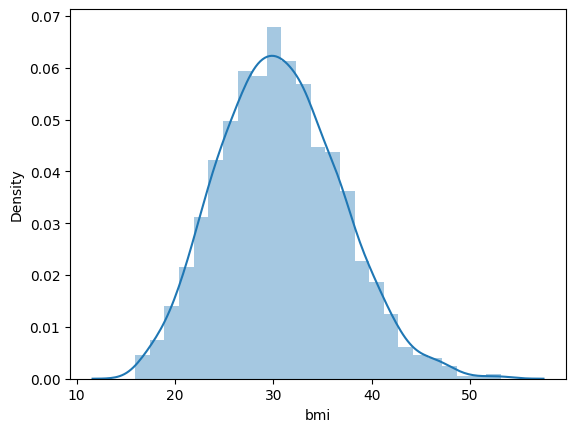

In [ ]:
sns.distplot(data['bmi'])

In [ ]:
data['bmi'].skew() # rightly skewed

0.28391419385321137

### Since the distribution is Skewed so we use IQR(Inter Quantile Range) for outlier removal.

In [ ]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
print(Q1, Q3)

26.29 34.7


In [ ]:
IQR = Q3 - Q1
print(IQR)

8.410000000000004


In [ ]:
lower_bmi = Q1 - 1.5*IQR
upper_bmi = Q3 + 1.5*IQR
print(lower_bmi, upper_bmi)

13.674999999999994 47.31500000000001


#### These are outliers of bmi column.

In [ ]:
data[(data['bmi']<lower_bmi) | (data['bmi']>upper_bmi)]

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
116,58,male,49.06,0,no,southeast,11381.32540,Obesity,No
286,46,female,48.07,2,no,northeast,9432.92530,Obesity,Yes
401,47,male,47.52,1,no,southeast,8083.91980,Obesity,Yes
543,54,female,47.41,0,yes,southeast,63770.42801,Obesity,No
847,23,male,50.38,1,no,southeast,2438.05520,Obesity,Yes
860,37,female,47.60,2,yes,southwest,46113.51100,Obesity,Yes
1047,22,male,52.58,1,yes,southeast,44501.39820,Obesity,Yes
1088,52,male,47.74,1,no,southeast,9748.91060,Obesity,Yes
1317,18,male,53.13,0,no,southeast,1163.46270,Obesity,No


In [ ]:
data.shape

(1337, 9)

In [ ]:
data = data[(data['bmi']>lower_bmi) & (data['bmi']<upper_bmi)]

In [ ]:
data.shape

(1328, 9)

In [ ]:
data = data.reset_index(drop=True)
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Yes
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Yes
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,No
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No


In [ ]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
count,1328.000000,1328,1328.000000,1328.000000,1328,1328,1328.000000,1328,1328
unique,NaN,2,NaN,NaN,2,4,NaN,4,2
top,NaN,male,NaN,NaN,no,southeast,NaN,Obesity,Yes
freq,NaN,669,NaN,NaN,1057,357,NaN,697,758
mean,39.219127,NaN,30.537308,1.097139,NaN,NaN,13221.047810,NaN,NaN
std,14.042170,NaN,5.922176,1.208008,NaN,NaN,11997.547468,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,NaN,NaN
25%,27.000000,NaN,26.220000,0.000000,NaN,NaN,4744.325050,NaN,NaN
50%,39.000000,NaN,30.300000,1.000000,NaN,NaN,9369.615750,NaN,NaN
75%,51.000000,NaN,34.488750,2.000000,NaN,NaN,16604.302645,NaN,NaN


### Now our dataset is free of unwanted column, null values, duplicated values and outliers. So now we may proceed to Data Analysis.

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


### Data Distribution

In [ ]:
fig = px.pie(
    names=data['sex'].value_counts().index,
    values=data['sex'].value_counts().values,
    title="Gender Distribution"
)

fig.show()

### Gender wise data is uniformly distributed

In [ ]:
bins = pd.cut(data['age'], bins=5)

bin_labels = bins.astype(str)

fig = px.pie(
    names=bin_labels.value_counts().index,
    values=bin_labels.value_counts().values,
    title="Age Distribution (Binned)"
)

fig.show()

### The data shows that age distribution is fairly uniform overall. However, individuals aged 18 to 30 are more active in purchasing insurance policies.

In [ ]:
fig = px.pie(
    names=data['BMI Range'].value_counts().index,
    values=data['BMI Range'].value_counts().values,
    title="BMI Distribution"
)

fig.show()

### The BMI distribution reveals that nearly half of the individuals belong to the obese category, with the remaining distribution showing a higher proportion of overweight individuals compared to those with a healthy BMI.

In [ ]:
fig = px.pie(
    names=data['region'].value_counts().index,
    values=data['region'].value_counts().values,
    title="Region Distribution"
)

fig.show()

### The data is evenly distributed across all regions, indicating no significant regional variation in representation.

In [ ]:
fig = px.pie(
    names=data['smoker'].value_counts().index,
    values=data['smoker'].value_counts().values,
    title="Smoker Distribution"
)

fig.show()

### The majority of individuals, approximately 80%, are non-smokers, while the remaining 20% are smokers.

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='Relationship Between Age and Insurance Charges'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

#### The plot shows a general trend where medical charges tend to increase with age. However, there are instances where individuals with lower ages still incur high charges. This could be due to various factors such as smoking, high BMI, region, or other underlying health conditions. Further investigation into these variables may help explain these anomalies and provide a more comprehensive understanding of the relationship between age and charges.

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='Age vs Insurance Charges by Gender Distribution',
    color='sex'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### No gender is not the reason.

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='"Age vs Insurance Charges by BMI Range',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### Surprisingly, the BMI range is not the primary factor driving medical charges. However, individuals categorized as obese tend to incur higher charges. Additionally, these charges gradually increase with age, as observed in the figure below.

In [ ]:
fig = px.scatter(
    data[data['BMI Range']=='Obesity'],
    x='age',
    y='charges',
    title='Age vs Charges for Obese People',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### This plot suggests that obesity is not the sole factor influencing insurance costs. However, some obese individuals are paying higher insurance costs compared to others within the same age group.

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='Age vs Insurance Charges Across Regions',
    color='region'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### The region does not appear to be a significant factor.

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='Age vs Insurance Charges by Parental Status',
    color='child'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### Being a parent does not appear to be a contributing factor for higher insurance charges.

### Now we check for smoker

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    title='Age vs. Insurance Charges: Role of Smoking',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### It is evident that smoking is a significant factor contributing to the increase in insurance charges. Therefore, quitting smoking today is one of the best decisions you can make for both your health and your finances.

In [ ]:
fig = px.scatter(
    data[data['smoker']=='yes'],
    x='age',
    y='charges',
    title='Age vs. Insurance Charges: Role of Smoking',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
fig = px.scatter(
    data[data['smoker']=='yes'],
    x='age',
    y='charges',
    title='Age vs. Insurance Charges: Role of Smoking',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
fig = px.scatter(
    data[data['smoker']=='no'],
    x='age',
    y='charges',
    title='Age vs. Insurance Charges: Role of Smoking',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
fig = px.scatter(
    data[data['smoker']=='no'],
    x='age',
    y='charges',
    title='Age vs. Insurance Charges: Role of Smoking',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='sex',
    title='Distribution of Insurance Charges by Gender and Smoking Status',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='BMI Range',
    title='Distribution of Insurance Charges by BMI and Smoking Status',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='BMI Range',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


### In this plot, we observe that for each BMI category, individuals who do not smoke tend to have similar insurance charges. However, those who smoke have significantly higher charges, particularly in the Obesity category, where the charges are the highest.

In [ ]:
fig = px.box(
    data,
    y='charges',
    x='region',
    title='Distribution of Insurance Charges by Region and Smoking Status',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='child',
    title='Distribution of Insurance Charges by Parental Status and Smoking Status',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Parental Status',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


### In each box plot, we observe that for non-smokers, the insurance charges remain relatively consistent across different categories. However, for smokers, the charges are significantly higher, whether it be by gender, region, parental status, or BMI.

### Now, let's analyze the relationship between BMI and insurance charges.

In [ ]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    title='Relationship Between BMI and Insurance Charges'
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### While charges do not consistently increase with BMI, there is a slight trend indicating that insurance charges tend to rise as BMI increases. This suggests that, although charges remain relatively stable with BMI, they do show an upward pattern for the same dataset as BMI increases. This warrants further exploration to understand the underlying factors contributing to this trend.

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    title='BMI vs Insurance Charges by Gender',
    color='sex'
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    title='BMI vs Insurance Charges by Region',
    color='region'
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    title='BMI vs Insurance Charges by Parental Status',
    color='child'
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### Factors such as gender, region, and parental status do not appear to significantly explain the trends in insurance charges, as there is no clear pattern or correlation observed with these variables.

### Now, let's focus on smoking, as it seems to be a key factor influencing the trends in insurance charges

In [ ]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    title='BMI vs Insurance Charges by Smoker',
    color='smoker',
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### Here, we can observe that smoking is the primary factor driving the increase in charges as BMI rises. For non-smokers, however, the charges remain relatively consistent despite the increase in BMI.

In [ ]:
fig = px.box(
    data,
    y='charges',
    x='sex',
    title='Distribution of Insurance Charges by Gender and BMI Range',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='region',
    title='Distribution of Insurance Charges by Region and BMI Range',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='child',
    title='Distribution of Insurance Charges by Parental Status and BMI Range',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Parental Status',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


In [ ]:
fig = px.box(
    data,
    y='charges',
    x='smoker',
    title='Distribution of Insurance Charges by Smoker and BMI Range',
    color='BMI Range'
)

fig.update_layout(
    xaxis_title='Smoker',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()


### This insight is derived from the box plot analysis, where we observe that while insurance charges remain relatively consistent across BMI categories for different genders, parental statuses, and regions, they increase notably for smokers, especially those in the obese category.

### In conclusion, smoking stands out as the most significant factor influencing insurance charges, followed by age and BMI. On the other hand, region and parental status have little to no impact on the charges. This relationship can be further validated through a correlation plot, which will illustrate the strength of these associations.

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
df1 = pd.get_dummies(data[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']], drop_first=True, dtype='int')
df1.head(2)

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.90,0,16884.9240,0,1
1,18,33.77,1,1725.5523,1,0


### By analyzing the data with age, smoking status, and BMI together, we can gain a clearer and more comprehensive understanding of how these factors interact to influence insurance charges.

In [ ]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    color='smoker',
    symbol='BMI Range',
    title='Age vs Insurance Charges by Smoking Status and BMI Range',
    color_discrete_map={'yes': 'red', 'no': 'green'},
    symbol_map={
        'Underweight': 'circle',
        'Healthy': 'square',
        'Overweight': 'diamond',
        'Obesity': 'cross'
    }
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

### From the scatter plot, we can conclude the following:

### Non-smokers: Regardless of the BMI range category, there is a consistent increase in insurance charges with age. This indicates a steady correlation between age and insurance costs for non-smokers.

### Smokers: For smokers, especially those in the obese category, insurance charges are significantly higher, even at a young age. These charges increase gradually with age but start from a relatively high base, highlighting the substantial impact of smoking on insurance costs.

In [ ]:
df2 = data.copy()
df2['Healthy'] = np.where(df2['BMI Range']=='Healthy', 'Healthy', 'Unhealthy') # Here those whose BMI Range is healthy is marked yes and rest are marked no
df2.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child,Healthy
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No,Unhealthy
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes,Unhealthy


In [ ]:
fig = px.scatter(
    df2,
    x='age',
    y='charges',
    title='Age vs Insurance Charges by Smoking Status and BMI Range',
    color='smoker',
    symbol='Healthy',
    color_discrete_map={'yes': 'red', 'no': 'green'},
    symbol_map={
        'Healthy': 'circle',
        'Unhealthy': 'cross'
    }
)

fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Charges',
    showlegend=True,
    height=600,
    width=1050,
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    data,
    x='age',
    y='charges',
    color='smoker',
    facet_col='BMI Range',
    title='Age vs Insurance Charges by BMI Range and Smoking Status',
     color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Insurance Charges',
    showlegend=True,
    height=800,
    width=1050,
)

fig.show()


### Based on the analysis across various plots, we can conclude that insurance charges are higher for smokers, with the highest charges observed in those who are both smokers and obese. In contrast, for non-smokers, the insurance charges remain relatively consistent across all BMI categories.

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Yes
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Yes
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,No
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No


In [ ]:
df1 = data.drop(['BMI Range', 'child'], axis=1)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1 = pd.get_dummies(df1, drop_first=True, dtype='int')
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df1
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [ ]:
vif

,VIF,Features
0,9.605791,age
1,11.583235,bmi
2,1.818210,children
3,7.987678,charges
4,2.001762,sex_male
5,4.003923,smoker_yes
6,1.915007,region_northwest
7,2.246434,region_southeast
8,1.989783,region_southwest


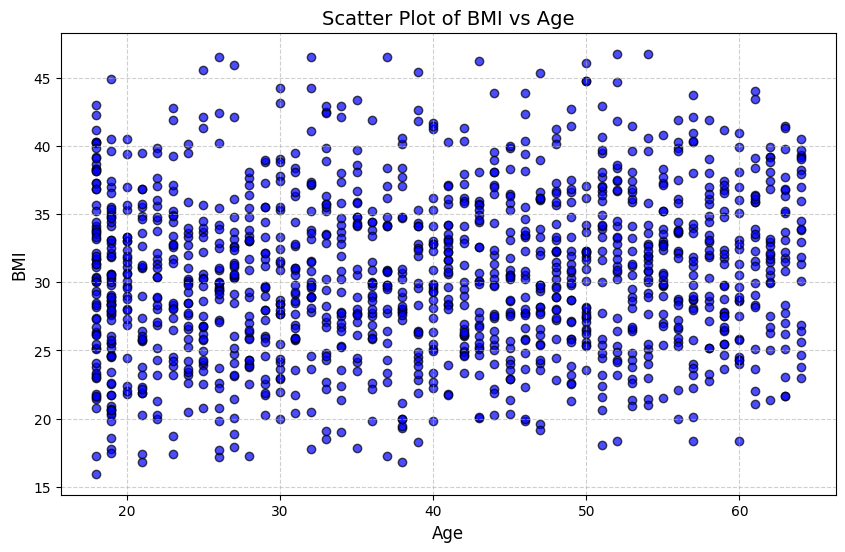

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['age'], df1['bmi'], c='blue', alpha=0.7, edgecolors='k')

# Add labels and title
plt.title('Scatter Plot of BMI vs Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
correlation = df1['age'].corr(df1['bmi'])  # Pearson correlation
print(f"Correlation between Age and BMI: {correlation}")

Correlation between Age and BMI: 0.1147851877725156


In [ ]:
spearman_corr = df1['age'].corr(df1['bmi'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: 0.10909787523360243


### We have checked there is no multicollinearity in our dataset.

### Now we check for linearity

In [ ]:
fig = px.scatter(df1, x='bmi', y='charges')
fig.update_layout(height=600, width=1050)

fig.show()

In [ ]:
fig = px.scatter(df1, x='age', y='charges')
fig.update_layout(height=600, width=1050)

fig.show()

In [ ]:
pearson_corr = df1['bmi'].corr(df1['charges'])
print(f"Pearson Correlation: {pearson_corr}")

spearman_corr = df1['bmi'].corr(df1['charges'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.19327037351341986
Spearman Correlation: 0.11875258591073304


In [ ]:
pearson_corr = df1['age'].corr(df1['charges'])
print(f"Pearson Correlation: {pearson_corr}")

spearman_corr = df1['age'].corr(df1['charges'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.3013168256865654
Spearman Correlation: 0.5345199008003675


In [ ]:
pearson_corr = df1['smoker_yes'].corr(df1['charges'])
print(f"Pearson Correlation: {pearson_corr}")

spearman_corr = df1['smoker_yes'].corr(df1['charges'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7858956188295467
Spearman Correlation: 0.661966264045683


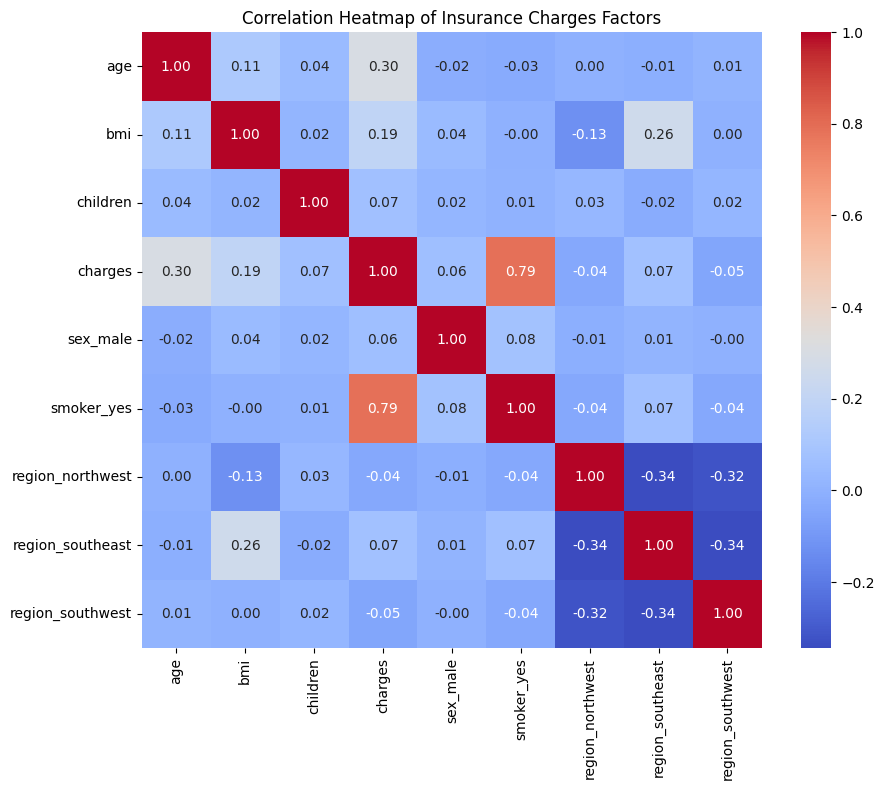

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Display the plot
plt.title('Correlation Heatmap of Insurance Charges Factors')
plt.show()

#### Key Insights:
#### Age and Charges:

#### Correlation: 0.301 (Pearson correlation between age and charges) – Moderate positive correlation.
#### This indicates that as age increases, charges also tend to increase, though the relationship is not very strong.
#### BMI and Charges:

#### Correlation: 0.193 (Pearson correlation between BMI and charges) – Weak positive correlation.
#### This suggests a weak relationship between BMI and charges. While BMI increases, the effect on charges is not substantial.
#### Smoker and Charges:

#### Correlation: 0.785 (Pearson correlation between smoker_yes and charges) – Strong positive correlation.
#### This indicates that being a smoker has a very strong positive correlation with insurance charges. Smokers are more likely to have higher charges, which makes sense given the health risks associated with smoking.
#### Sex and Charges:

#### Correlation: 0.064 (Pearson correlation between sex_male and charges) – Very weak positive correlation.
#### Gender has a minimal impact on charges according to this correlation.
#### Region and Charges:

#### The correlation values between region variables and charges are quite low:
#### Region_northwest: -0.036
#### Region_southeast: 0.071
#### Region_southwest: -0.046
#### These correlations suggest that the region doesn't significantly affect the charges.

### Based on the analysis of the correlation matrix and the absence of significant multicollinearity, we can conclude that the assumptions for building a linear regression model are largely met. Specifically:

### Linearity: The relationships between the predictor variables (age, BMI, smoker) and the target variable (charges) are reasonably linear, especially for age and smoker.
### No Multicollinearity: There is no strong multicollinearity among the predictor variables, as evidenced by the relatively low correlation values and manageable VIF scores.
### Therefore, we can confidently proceed with developing a Multiple Linear Regression model for predicting charges.

### First we take all features into consideration for predicting charges.

In [ ]:
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
X = df1[numerical_cols + categorical_cols]
y = df1[['charges']]

In [ ]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
749,24,33.63,4,1,0,0,0,0
421,48,30.20,2,1,0,0,0,1
718,19,35.40,0,1,0,0,0,1
381,35,43.34,2,0,0,0,1,0
928,59,27.50,0,0,0,0,0,1


In [ ]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
300,56,37.51,2,0,0,0,1,0
871,41,28.80,1,1,0,0,0,1
870,33,33.44,5,1,0,0,1,0
1153,30,38.83,1,1,0,0,1,0
1264,35,27.61,1,1,0,0,1,0


In [ ]:
y_train.head()

,charges
749,17128.42608
421,8968.33000
718,1263.24900
381,5846.91760
928,12233.82800


In [ ]:
y_test.head()

,charges
300,12265.50690
871,6282.23500
870,6653.78860
1153,18963.17192
1264,4747.05290


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

In [ ]:
X_train_scaled[1]

array([ 0.61000663, -0.04547051,  0.71969075,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ])

In [ ]:
X_test_scaled[1]

array([ 0.11315379, -0.28202627, -0.10369928,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_hat = model.predict(X_train_scaled)
y_hat[0:10]

array([[ 7636.11097974],
       [10515.35982053],
       [ 3801.61784817],
       [11260.16088183],
       [11324.81675551],
       [ 4832.44239142],
       [ 2949.25224531],
       [15187.56933825],
       [28441.9512718 ],
       [12231.96847243]])

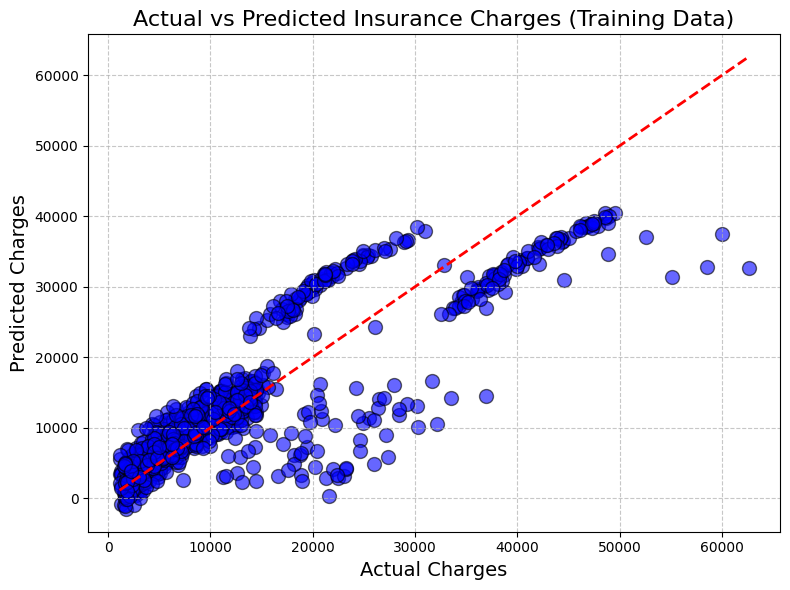

In [ ]:
y_train_values = y_train.values

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_hat, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Training Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_train_values), max(y_train_values)], [min(y_train_values), max(y_train_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred[0:10]

array([[14803.37640896],
       [ 7837.63123027],
       [ 9355.79834547],
       [ 8344.37038487],
       [ 6182.36552875],
       [ 3589.28657453],
       [ 2305.86580901],
       [11234.69204672],
       [16327.32959689],
       [ 9030.03466947]])

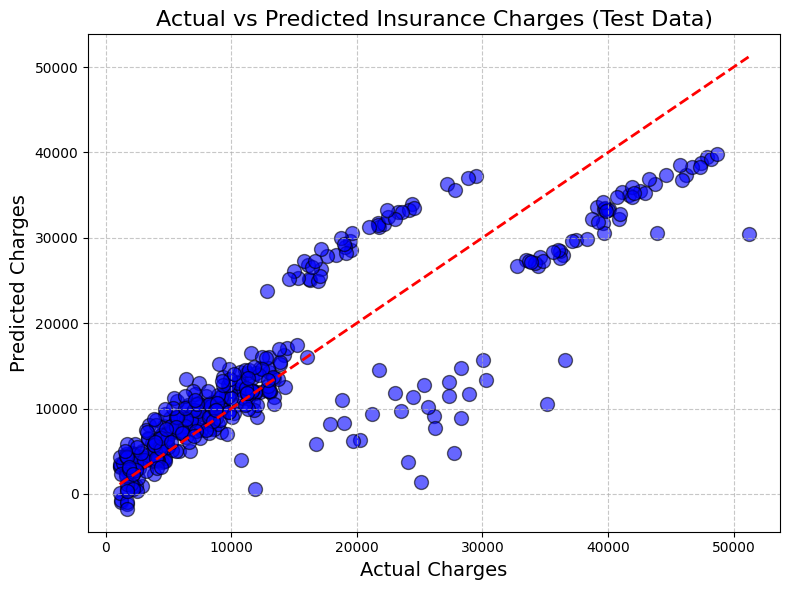

In [ ]:
plt.figure(figsize=(8, 6))

y_test_values = y_test.values

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Test Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

### Based on the scatter plot, it is evident that the model performs better for predicting lower values of insurance charges, but shows less efficiency in accurately predicting higher values.

In [ ]:
model.coef_[-1]

array([ 3572.79157891,  1809.22260684,   576.39133406,   205.48342943,
       23611.53177667,  -597.79972762,  -979.16210148, -1209.23970841])

In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coef':model.coef_[-1]})
coef_df

,Features,Coef
0,age,3572.791579
1,bmi,1809.222607
2,children,576.391334
3,sex_male,205.483429
4,smoker_yes,23611.531777
5,region_northwest,-597.799728
6,region_southeast,-979.162101
7,region_southwest,-1209.239708


#### Age: The positive coefficient of 3572.79 for age indicates that, as a person gets older, their insurance charges tend to increase. This suggests that older individuals generally face higher insurance premiums.

#### BMI: The coefficient of 1809.22 for bmi shows that as a person's BMI increases, so do their insurance charges. This makes sense, as individuals with a higher BMI are often considered higher risk for health issues, leading to higher premiums.

#### Children: The coefficient of 576.39 for children implies that having more children is associated with a slight increase in insurance charges. This could reflect the added complexity of insuring dependents.

#### sex_male: The coefficient of 205.48 for sex_male compares the charges for males with the reference group, which is likely females (assuming the model used female as the reference category). A positive coefficient means that, on average, males have slightly higher insurance charges than females, but this effect is relatively small compared to other variables like BMI or smoking status.

#### smoker_yes: The large positive coefficient of 23611.53 for smoker_yes compares the charges for smokers with non-smokers (the reference category). A positive coefficient this large indicates that smokers face significantly higher insurance premiums than non-smokers, which aligns with expectations due to the health risks associated with smoking.

#### Region: The negative coefficients for region_northwest, region_southeast, and region_southwest (i.e., -597.80, -979.16, and -1209.24 respectively) suggest that living in these regions results in lower insurance charges compared to the reference region (likely the northeast region). This might be due to regional differences in health care costs or other demographic factors influencing insurance rates.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2_train = r2_score(y_train, y_hat)
mae_train = mean_absolute_error(y_train, y_hat)
mse_train = mean_squared_error(y_train, y_hat)
rmse_train = np.sqrt(mse_train)

# For Test Data
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print results for train and test data
print(f"Train R²: {r2_train:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print("\n")
print(f"Test R²: {r2_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R²: 0.75
Train MAE: 3978.74
Train MSE: 34663501.70
Train RMSE: 5887.57


Test R²: 0.74
Test MAE: 4382.09
Test MSE: 39272856.69
Test RMSE: 6266.81


## Model Performance Breakdown:

### 1. R² (Train: 0.75, Test: 0.74):
- **Train R²**: 0.75 means that your model explains 75% of the variance in the training data. This indicates a strong fit to the training data.
- **Test R²**: 0.74 suggests that the model generalizes quite well to unseen data, explaining 74% of the variance in the test data. The slight drop (from 0.75 to 0.74) is natural and indicates the model isn't overfitting to the training data. This drop is minimal, so the model is performing reasonably well.

### 2. MAE (Train: 3978.74, Test: 4382.09):
- **Train MAE**: 3978.74 indicates the average absolute error for the training data. On average, the model’s predictions are off by this value.
- **Test MAE**: 4382.09 indicates the average absolute error for the test data. The increase in error on the test set suggests the model performs slightly worse on unseen data, which is typical due to overfitting or the inherent noise in new data. However, this increase is not very significant, meaning the model is still quite good at making predictions.

### 3. MSE (Train: 34663501.70, Test: 39272856.69):
- **Train MSE**: 34663501.70 indicates the squared average error in predictions on the training set. The model’s error is somewhat larger when you square it, but the model is still performing reasonably well.
- **Test MSE**: 39272856.69 reflects the squared error for the test set, which is slightly larger than the training set. The increase in MSE indicates that the model struggles a bit more when applied to unseen data, which is expected. However, this increase is also not very large, suggesting the model is still generalizing well.

### 4. RMSE (Train: 5887.57, Test: 6266.81):
- **Train RMSE**: 5887.57 is the square root of MSE, representing the error in the same units as the target variable. It indicates that, on average, your model’s predictions are off by about 5887.57 units on the training set.
- **Test RMSE**: 6266.81 indicates the average prediction error on the test set. The slight increase in RMSE on the test data suggests that the model's predictions are a bit less accurate when applied to new data, which is a typical scenario when a model is exposed to previously unseen data.

---

## Key Insights:

### **Overfitting Check**:
There's a slight increase in error (MAE, MSE, RMSE) on the test data compared to the training data. This is a typical sign of overfitting, where the model fits the training data very well but struggles to generalize to unseen data. However, the increase in error is not significant, so your model is still generalizing well.

### **Model Quality**:
The R² value close to 0.75 for both the training and test sets indicates that the model is performing well overall. While it's not a perfect model, it's still able to capture a good portion of the variance in the data and make reasonable predictions.

### **Room for Improvement**:
Although the model generalizes well, there's still some room for improvement, especially in reducing the prediction errors (as seen in MAE, MSE, and RMSE).


<Axes: ylabel='Density'>

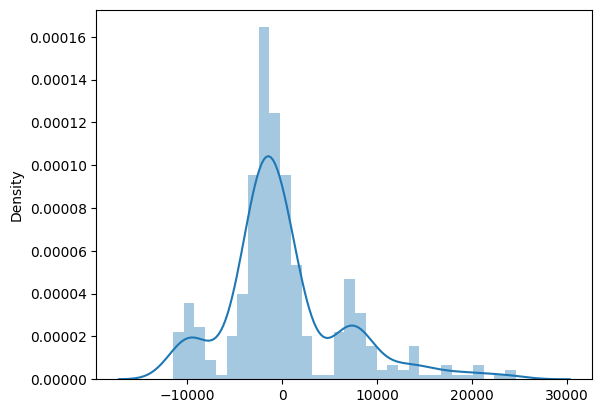

In [ ]:
sns.distplot(y_test - y_pred)

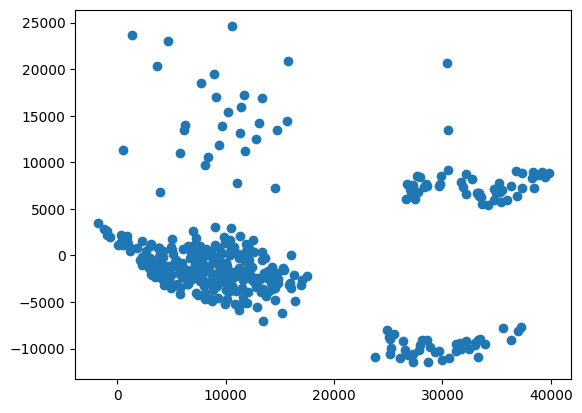

In [ ]:
plt.scatter(y=y_test - y_pred, x=y_pred)
plt.show()

In [ ]:
review_df = pd.DataFrame({'Actual Value': np.reshape(y_test.values, (y_test.size,)), 'Predicted Value': np.reshape(y_pred, (y_pred.size,))})
review_df['Residual'] = review_df['Actual Value'] - review_df['Predicted Value']
review_df['Difference%'] = np.absolute(review_df['Residual']/review_df['Actual Value']*100)
review_df.head()

,Actual Value,Predicted Value,Residual,Difference%
0,12265.50690,14803.376409,-2537.869509,20.691110
1,6282.23500,7837.631230,-1555.396230,24.758644
2,6653.78860,9355.798345,-2702.009745,40.608590
3,18963.17192,8344.370385,10618.801535,55.996969
4,4747.05290,6182.365529,-1435.312629,30.235868


In [ ]:
review_df.describe(include='all')

,Actual Value,Predicted Value,Residual,Difference%
count,399.000000,399.000000,399.000000,399.000000
mean,13774.973849,13654.010572,120.963277,42.538990
std,12401.569274,10560.817374,6273.504868,41.640124
min,1121.873900,-1784.211206,-11494.812414,0.026671
25%,4742.660550,6262.605496,-2771.405106,16.315756
50%,9386.161300,10412.318869,-1128.823120,28.411410
75%,18539.239850,15813.119909,1382.502593,55.499361
max,51194.559140,39811.730558,24589.086337,281.610829


### Residuals:
- **Mean Residual**: 120.96, which suggests that on average, the predicted values are off by around 120.96 units from the actual values. This indicates a relatively small average error.
- **Standard Deviation (std)**: 6273.50, which is quite large compared to the mean. This indicates a high variability in the residuals, suggesting that while some predictions are very close to the actual values, others are significantly off.
- **Range**: The residuals range from -11,494.81 to +24,589.09, showing that the model has some large errors, especially on extreme values.

### Difference Percentage (Difference%):
- **Mean Difference%**: 42.54%. On average, your model’s predictions differ from the actual values by approximately 42.54%. This is quite high, indicating a significant level of inaccuracy in your predictions.
- **Range of Difference%**: The difference percentage ranges from 0.03% to 281.61%. The high maximum value of 281.61% suggests that for some predictions, the model is off by a large margin relative to the actual value. This may indicate potential outliers or problematic predictions.

### Percentiles:
- **25%**: 16.32% of predictions have a difference of less than 16.32% from the actual values.
- **50%**: 28.41% of predictions are off by less than 28.41%.
- **75%**: 55.50% of predictions are off by less than 55.50%.


In [ ]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_ols).fit()

(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     347.9
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          4.36e-272
Time:                        08:03:33   Log-Likelihood:                -9382.5
No. Observations:                 929   AIC:                         1.878e+04
Df Residuals:                     920   BIC:                         1.883e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.083e+04   1170.998     -9.253      0.000   -1.31e+04   -8536.589
age                253.5931     13.933     18.201      0.000     226.249     280.937
bmi                305.7015     34.325      8.906      0.000     238.336     373.067
children           474.5949    160.243      2.962      0.003     160.110     789.080
sex_male           205.4834    390.309      0.526      0.599    -560.515     971.482
smoker_yes        2.361e+04    496.208     47.584      0.000    2.26e+04    2.46e+04
region_northwest  -597.7997    550.854     -1.085      0.278   -1678.876     483.276
region_southeast  -979.1621    570.266     -1.717      0.086   -2098.335     140.010
region_southwest -1209.2397    563.218     -2.147      0.032   -2314.581    -103.898
==============================================================================
Omnibus:                      233.963   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.477
Skew:                           1.291   Prob(JB):                    5.01e-135
Kurtosis:                       6.051   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Summary:

- **R-squared**: 0.752, indicating that approximately 75.2% of the variance in the target variable (charges) is explained by the model.
- **Adj. R-squared**: 0.749, which adjusts the R-squared value for the number of predictors in the model, indicating a slightly lower explanatory power after considering the predictors.
- **Durbin-Watson**: 2.047, indicating no significant autocorrelation of residuals (values closer to 2 indicate no autocorrelation).

### Key Coefficients:
- **Age**: 253.59, statistically significant (p-value = 0.000). For each additional year of age, the charge is expected to increase by 253.59 units.
- **BMI**: 305.70, statistically significant (p-value = 0.000). For each unit increase in BMI, the charge is expected to increase by 305.70 units.
- **Children**: 474.59, statistically significant (p-value = 0.003). For each additional child, the charge increases by 474.59 units.
- **Sex (Male)**: 205.48, not statistically significant (p-value = 0.599), indicating that gender does not have a strong impact on the charges.
- **Smoker (Yes)**: 23,610.00, statistically significant (p-value = 0.000). Smokers are expected to have charges 23,610 units higher compared to non-smokers.
- **Region (Northwest)**: -597.80, not statistically significant (p-value = 0.278).
- **Region (Southeast)**: -979.16, statistically significant (p-value = 0.086), with a p-value close to 0.05, suggesting it might have a moderate effect on charges.
- **Region (Southwest)**: -1,209.24, statistically significant (p-value = 0.032). Living in the southwest region is associated with a decrease in charges by 1,209.24 units.

### Additional Tests:
- **Omnibus**: 233.963 (p-value = 0.000), indicating that the residuals deviate significantly from a normal distribution.
- **Jarque-Bera**: 618.477 (p-value = 5.01e-135), confirming non-normality of the residuals.
- **Skew**: 1.291, indicating the residuals are positively skewed (more weight on the left side of the distribution).
- **Kurtosis**: 6.051, indicating the residuals have heavy tails (outliers are present).

### Conclusion:
The model is statistically significant and explains a good portion of the variance in charges. However, some predictors like gender and region are not significant. So now we try by removing those variables.


### This time we will remove sex and region column as they are not important column.

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Yes
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Yes
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,No
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No


In [ ]:
df2 = data.drop(['BMI Range', 'child', 'region', 'sex'], axis=1)
df2.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [ ]:
df2 = pd.get_dummies(df2, drop_first=True, dtype='int')
df2.head()

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['smoker_yes']
X = df2[numerical_cols + categorical_cols]
y = df2[['charges']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_hat = model.predict(X_train_scaled)
y_hat[0:10]

array([[ 6793.8861441 ],
       [10923.58834196],
       [ 4152.38821159],
       [11478.08514142],
       [11973.34242457],
       [ 4809.0490734 ],
       [ 3445.95110741],
       [15235.77580265],
       [28515.36875193],
       [11642.25789519]])

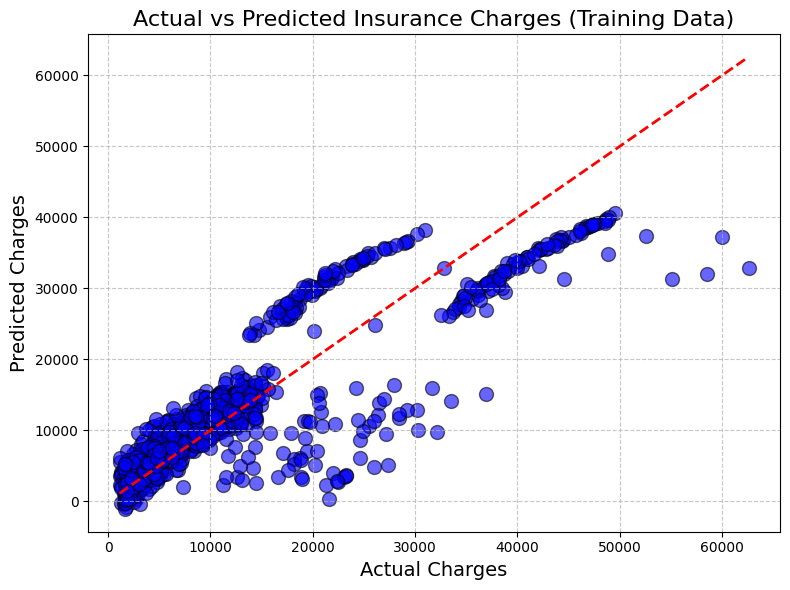

In [ ]:
y_train_values = y_train.values

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_hat, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Training Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_train_values), max(y_train_values)], [min(y_train_values), max(y_train_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred[0:10]

array([[15091.34206061],
       [ 8266.76544884],
       [ 9491.78401031],
       [ 8417.18361379],
       [ 6398.06980501],
       [ 3578.6598672 ],
       [ 1637.61513728],
       [11035.12527046],
       [16823.81885276],
       [ 9772.67938   ]])

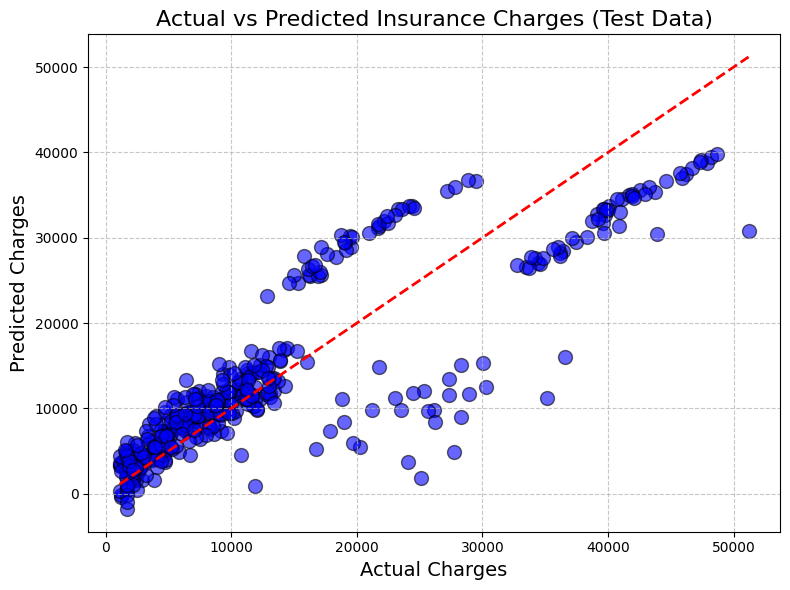

In [ ]:
plt.figure(figsize=(8, 6))

y_test_values = y_test.values

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Test Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2_train = r2_score(y_train, y_hat)
mae_train = mean_absolute_error(y_train, y_hat)
mse_train = mean_squared_error(y_train, y_hat)
rmse_train = np.sqrt(mse_train)

# For Test Data
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print results for train and test data
print(f"Train R²: {r2_train:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print("\n")
print(f"Test R²: {r2_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R²: 0.75
Train MAE: 3983.13
Train MSE: 34867763.97
Train RMSE: 5904.89


Test R²: 0.74
Test MAE: 4390.34
Test MSE: 39323644.63
Test RMSE: 6270.86


### Summary of Differences:
- **No significant changes in R² values**, both training and test sets remain consistent.
- **Slight increase in error metrics (MAE, MSE, RMSE)** for both the training and test sets in the current model.
- These increases suggest that while the current model is slightly less accurate, the differences are minimal and do not drastically affect the overall performance. The changes in error metrics are likely due to the removal of the "sex" and "region" variables, which may have had some influence on the model's predictions.
- **Overall**, the current model performs very similarly to the previous one, with only minor differences in the error metrics.


In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coef':model.coef_[-1]})
coef_df

,Features,Coef
0,age,3569.571498
1,bmi,1733.248400
2,children,574.771623
3,smoker_yes,23595.877157


<Axes: ylabel='Density'>

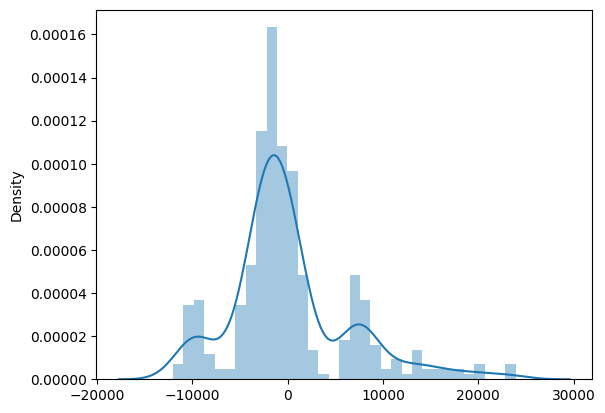

In [ ]:
sns.distplot(y_test - y_pred)


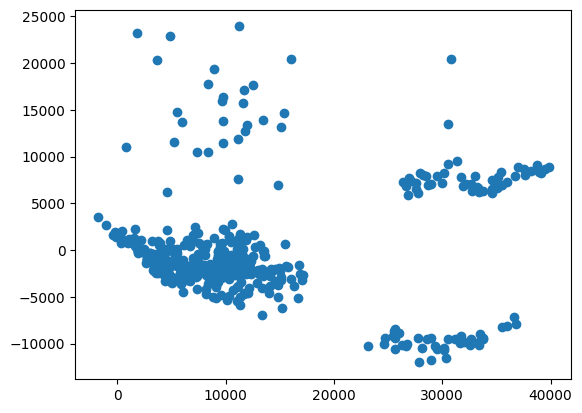

In [ ]:
plt.scatter(y=y_test - y_pred, x=y_pred)
plt.show()

In [ ]:
review_df2 = pd.DataFrame({'Actual Value': np.reshape(y_test.values, (y_test.size,)), 'Predicted Value': np.reshape(y_pred, (y_pred.size,))})
review_df2['Residual'] = review_df2['Actual Value'] - review_df2['Predicted Value']
review_df2['Difference%'] = np.absolute(review_df2['Residual']/review_df2['Actual Value']*100)
review_df2.head()

,Actual Value,Predicted Value,Residual,Difference%
0,12265.50690,15091.342061,-2825.835161,23.038878
1,6282.23500,8266.765449,-1984.530449,31.589561
2,6653.78860,9491.784010,-2837.995410,42.652323
3,18963.17192,8417.183614,10545.988306,55.612997
4,4747.05290,6398.069805,-1651.016905,34.779830


In [ ]:
review_df2.describe(include='all')

,Actual Value,Predicted Value,Residual,Difference%
count,399.000000,399.000000,399.000000,399.000000
mean,13774.973849,13656.476382,118.497467,42.098525
std,12401.569274,10494.981929,6277.608687,42.453367
min,1121.873900,-1794.256676,-12026.378718,0.007955
25%,4742.660550,6112.857656,-2784.498931,16.545043
50%,9386.161300,10326.171920,-1161.734018,28.620853
75%,18539.239850,15644.543332,1336.486870,55.416780
max,51194.559140,39820.355205,23931.994022,290.078948


### Summary of Residuals and Difference Percentage:

#### Conclusion:
- The overall performance of the model remains relatively similar with only minor adjustments in the residuals and difference percentage.
- The slight decrease in mean residual and mean difference percentage indicates a small improvement in prediction accuracy, but the increase in maximum residual and maximum difference percentage suggests that some large errors still exist.


### Even after removing sex and regoin we don't get enough success. Now we even remove children as it was also not the important factor

In [ ]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_ols).fit()

(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     693.4
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          2.02e-276
Time:                        08:04:08   Log-Likelihood:                -9385.2
No. Observations:                 929   AIC:                         1.878e+04
Df Residuals:                     924   BIC:                         1.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.103e+04   1113.890     -9.901      0.000   -1.32e+04   -8842.884
age          253.3645     13.934     18.183      0.000     226.019     280.710
bmi          292.8642     33.132      8.839      0.000     227.841     357.888
children     473.2612    160.154      2.955      0.003     158.953     787.569
smoker_yes   2.36e+04    491.529     48.005      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      239.728   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.175
Skew:                           1.316   Prob(JB):                    7.98e-141
Kurtosis:                       6.122   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
- The overall performance of the model remains similar despite the removal of `sex` and `region` variables. While the R-squared value has slightly decreased, the model's predictors still explain a large proportion of the variance in the dependent variable `charges`.
- The higher F-statistic in the current model indicates that the predictors in the reduced model are more significant.
- The differences in the coefficients for the remaining variables are minimal, suggesting that the features in the model still hold predictive power.

In [ ]:
df3 = data.drop(['BMI Range', 'child', 'region', 'sex', 'children'], axis=1)
df3.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [ ]:
df3 = pd.get_dummies(df3, drop_first=True, dtype='int')
df3.head()

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


In [ ]:
numerical_cols = ['age', 'bmi']
categorical_cols = ['smoker_yes']
X = df3[numerical_cols + categorical_cols]
y = df3[['charges']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_hat = model.predict(X_train_scaled)
y_hat[0:10]

array([[ 5404.59374045],
       [10528.3652019 ],
       [ 4646.6106336 ],
       [11061.12153226],
       [12546.0327237 ],
       [ 4359.84522499],
       [ 3003.71209116],
       [15808.98118958],
       [27602.47172934],
       [12207.64932338]])

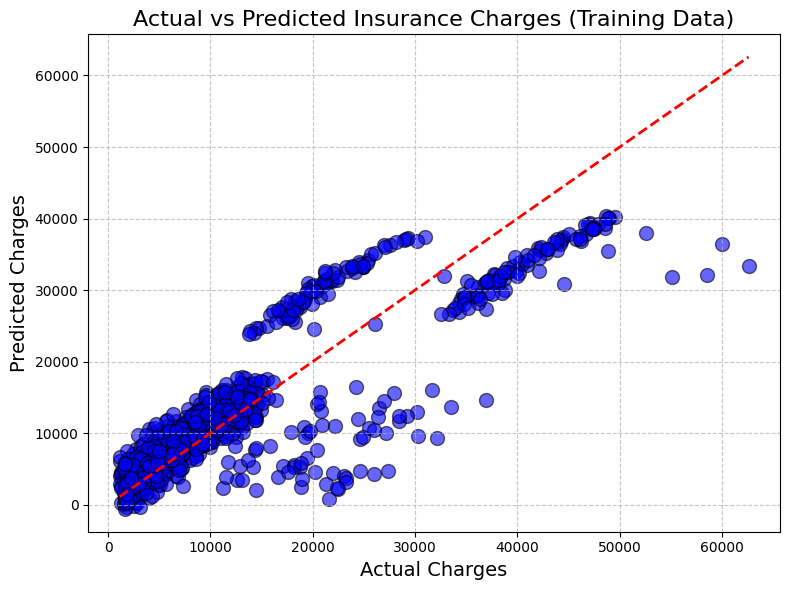

In [ ]:
y_train_values = y_train.values

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_hat, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Training Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_train_values), max(y_train_values)], [min(y_train_values), max(y_train_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred[0:10]

array([[14714.97547007],
       [ 8330.08167043],
       [ 7647.45046968],
       [ 8461.71678999],
       [ 6448.77084352],
       [ 3598.34911343],
       [  710.72225478],
       [10164.47729645],
       [16458.17779588],
       [ 9865.41167522]])

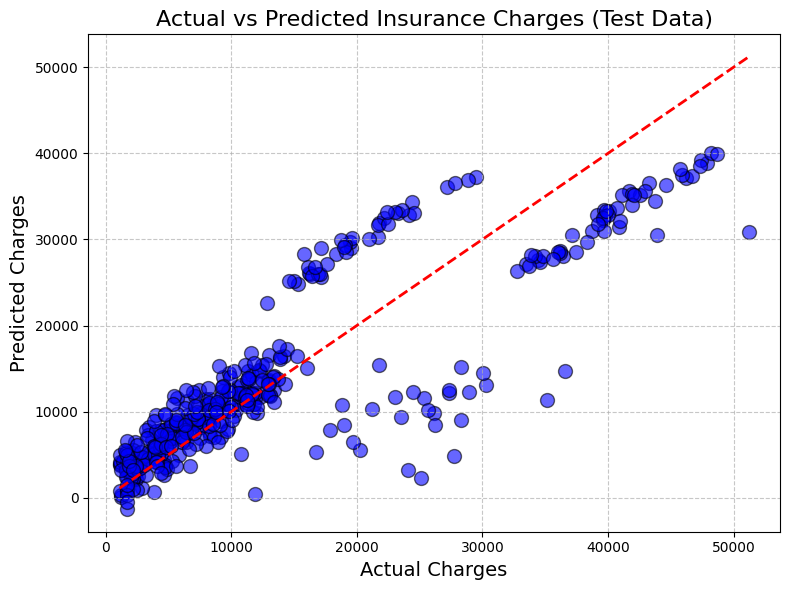

In [ ]:
plt.figure(figsize=(8, 6))

y_test_values = y_test.values

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Test Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2_train = r2_score(y_train, y_hat)
mae_train = mean_absolute_error(y_train, y_hat)
mse_train = mean_squared_error(y_train, y_hat)
rmse_train = np.sqrt(mse_train)

# For Test Data
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print results for train and test data
print(f"Train R²: {r2_train:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print("\n")
print(f"Test R²: {r2_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R²: 0.75
Train MAE: 4022.71
Train MSE: 35197281.42
Train RMSE: 5932.73


Test R²: 0.74
Test MAE: 4441.86
Test MSE: 39656458.28
Test RMSE: 6297.34


## Overall Conclusion:

- Removing the `children` variable did not significantly impact the R² values (both train and test), meaning the model still explains a similar amount of variance in the target variable.
- There was a slight increase in the error metrics (MAE, MSE, RMSE) for both the training and test sets, indicating a minor decrease in predictive performance.
- The impact of removing `children` is relatively small, but the model's accuracy has slightly decreased, particularly in terms of the error metrics. This is expected as `children` was a predictor, and removing it reduces the model's information.


In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coef':model.coef_[-1]})
coef_df

,Features,Coef
0,age,3598.199206
1,bmi,1735.354061
2,smoker_yes,23590.368525


<Axes: ylabel='Density'>

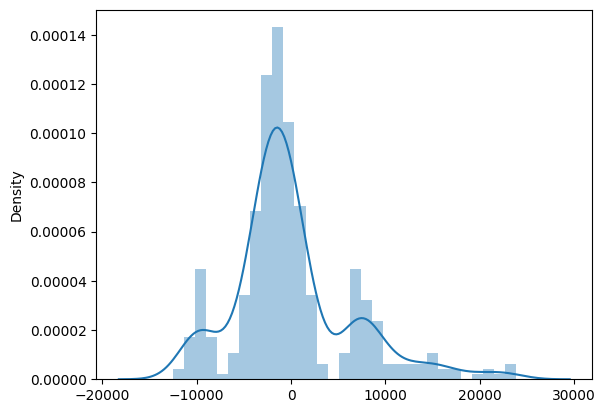

In [ ]:
sns.distplot(y_test - y_pred)


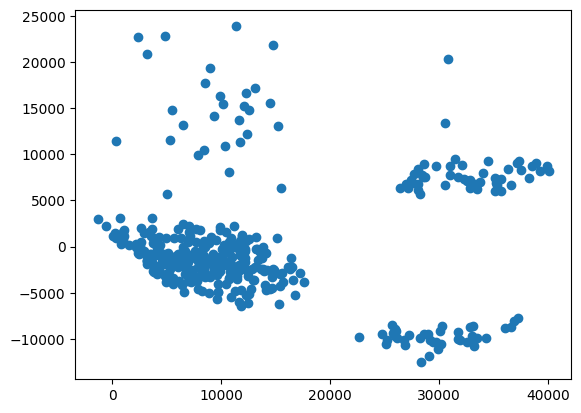

In [ ]:
plt.scatter(y=y_test - y_pred, x=y_pred)
plt.show()


In [ ]:
review_df3 = pd.DataFrame({'Actual Value': np.reshape(y_test.values, (y_test.size,)), 'Predicted Value': np.reshape(y_pred, (y_pred.size,))})
review_df3['Residual'] = review_df3['Actual Value'] - review_df3['Predicted Value']
review_df3['Difference%'] = np.absolute(review_df3['Residual']/review_df3['Actual Value']*100)
review_df3.head()

,Actual Value,Predicted Value,Residual,Difference%
0,12265.50690,14714.975470,-2449.468570,19.970382
1,6282.23500,8330.081670,-2047.846670,32.597422
2,6653.78860,7647.450470,-993.661870,14.933776
3,18963.17192,8461.716790,10501.455130,55.378157
4,4747.05290,6448.770844,-1701.717944,35.847882


In [ ]:
review_df3.describe(include='all')

,Actual Value,Predicted Value,Residual,Difference%
count,399.000000,399.000000,399.000000,399.000000
mean,13774.973849,13700.475545,74.498304,44.297304
std,12401.569274,10459.222818,6304.802430,47.173674
min,1121.873900,-1308.982779,-12547.971632,0.049819
25%,4742.660550,6256.568887,-2958.658228,16.796581
50%,9386.161300,10433.040523,-1120.063919,29.123684
75%,18539.239850,15625.575833,1446.063429,55.659623
max,51194.559140,40027.725822,23840.941864,333.257801


### Conclusion:

- The removal of the `children` variable led to minor changes in the residuals, with a decrease in the mean residual and a slight increase in the mean difference percentage.
- The model is performing similarly, but there is a minor increase in the overall spread of errors, as indicated by the slight changes in the residual statistics.

### Observations and Analysis:

| Metric                  | 1st Summary (All Variables)  | 2nd Summary (Sex, Region Removed)  | 3rd SummaryChildren also removeded)  |
|-------------------------|------------------------------|------------------------------------|--------------------------------|
| **Mean Difference (%)** | 42.54%                      | 42.10%                            | 44.30%                        |
| **Residual Mean**       | 120.96                      | 118.50                            | 74.50                         |
| **Residual Std Dev**    | 6273.50                     | 6277.61                           | 6304.80                       |
| **Max Difference (%)**  | 281.61%                     | 290.07%                           | 333.26%                       |
| **Median Residual**     | -1128.82                    | -1161.73                          | -1120.06                      |
| **Prediction Range**    | -1784.21 to 39811.73        | -1794.26 to 39820.35              | -1308.98 to 40027.73          |
| **Residual Range**      | -11494.81 to 24589.09       | -12026.38 to 23931.99             | -12547.97 to 23840.94         |

---

### Key Observations:

1. **Impact on Residual Mean**:
   - The **mean residual** decreased consistently across iterations (from `120.96` to `74.50`), showing slight improvement in accuracy after removing variables like `sex`, `region`, and `children`.

2. **Prediction Spread**:
   - The **predicted value range** remains mostly stable, but extreme negative predictions (e.g., `-1784.21` to `-1308.98`) indicate the model struggles in certain cases.

3. **Difference (%) Trends**:
   - The **mean difference percentage** increased slightly in the final iteration (~`44.30%`), possibly due to increased variability in extreme predictions.
   - The **maximum difference percentage** rose significantly (from ~`281.61%` to `333.26%`), highlighting inconsistent predictions for higher charges.

4. **Consistency in Residual Distribution**:
   - The **standard deviation of residuals** (~`6300`) stayed stable, indicating no significant reduction in error variability.

5. **Extreme Residuals**:
   - Despite refinements, the **range of residuals** worsened, with maximum negative residuals reaching ~`-12547.97`. This suggests the model underestimates certain high charges significantly.

---

### Key Takeaways:

- **Feature Selection**:
  - Removing less influential features like `sex`, `region`, and `children` had **minimal impact** on model performance.
  - The key features driving predictions are `age`, `bmi`, and `smoker`.

- **Model Behavior for Extreme Values**:
  - The model predicts **lower insurance charges** reasonably well but performs poorly for **higher charges**, as shown by large residuals and higherto identify patterns or biases in the dataset.



In [ ]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_ols).fit()

(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     914.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          4.73e-276
Time:                        08:04:40   Log-Likelihood:                -9389.6
No. Observations:                 929   AIC:                         1.879e+04
Df Residuals:                     925   BIC:                         1.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.059e+04   1108.358     -9.551      0.000   -1.28e+04   -8410.722
age          255.3965     13.975     18.275      0.000     227.970     282.823
bmi          293.2200     33.270      8.813      0.000     227.926     358.514
smoker_yes  2.359e+04    493.575     47.795      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      239.978   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.578
Skew:                           1.321   Prob(JB):                    7.95e-140
Kurtosis:                       6.094   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Overall, while the removal of the children variable had a marginal effect on the R-squared and model performance, it still maintains a good fit. This implies that children is a relevant but not critically essential predictor for explaining charges. The slight decrease in performance after removing it suggests that while children contributes useful information, the other variables in the model, such as age, bmi, and smoker_yes, are strong enough to maintain predictive accuracy.

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,BMI Range,child
0,19,female,27.90,0,yes,southwest,16884.9240,Overweight,No
1,18,male,33.77,1,no,southeast,1725.5523,Obesity,Yes


In [ ]:
df4 = data.drop(['sex', 'region', 'BMI Range', 'child'], axis = 1)
df4.head(2)

,age,bmi,children,smoker,charges
0,19,27.90,0,yes,16884.9240
1,18,33.77,1,no,1725.5523


In [ ]:
df4 = pd.get_dummies(df4, drop_first=True, dtype='int')
df4.head()

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
df4['log_charges'] = np.log(df4['charges'])
df4.head()

,age,bmi,children,charges,smoker_yes,log_charges
0,19,27.900,0,16884.92400,1,9.734176
1,18,33.770,1,1725.55230,0,7.453302
2,28,33.000,3,4449.46200,0,8.400538
3,33,22.705,0,21984.47061,0,9.998092
4,32,28.880,0,3866.85520,0,8.260197


In [ ]:
df4.drop(['charges'], axis=1, inplace=True)
df4.head(2)

,age,bmi,children,smoker_yes,log_charges
0,19,27.90,0,1,9.734176
1,18,33.77,1,0,7.453302


In [ ]:
fig = px.scatter(df4, x='bmi', y='log_charges')
fig.update_layout(height=600, width=1050)

fig.show()

In [ ]:
fig = px.scatter(df4, x='age', y='log_charges')
fig.update_layout(height=600, width=1050)

fig.show()

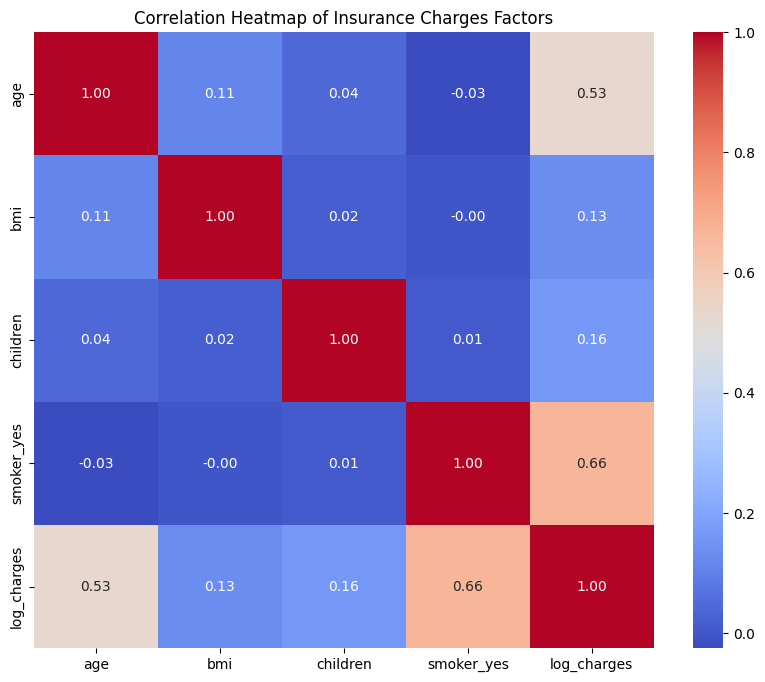

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Display the plot
plt.title('Correlation Heatmap of Insurance Charges Factors')
plt.show()

In [ ]:
df2.corr()

,age,bmi,children,charges,smoker_yes
age,1.000000,0.114785,0.042103,0.301317,-0.025075
bmi,0.114785,1.000000,0.017366,0.193270,-0.002868
children,0.042103,0.017366,1.000000,0.069125,0.007234
charges,0.301317,0.193270,0.069125,1.000000,0.785896
smoker_yes,-0.025075,-0.002868,0.007234,0.785896,1.000000


In [ ]:
df4.corr()

,age,bmi,children,smoker_yes,log_charges
age,1.000000,0.114785,0.042103,-0.025075,0.528411
bmi,0.114785,1.000000,0.017366,-0.002868,0.134098
children,0.042103,0.017366,1.000000,0.007234,0.160736
smoker_yes,-0.025075,-0.002868,0.007234,1.000000,0.663801
log_charges,0.528411,0.134098,0.160736,0.663801,1.000000


#### Key Takeaways:
#### Log-transformation of the target variable (charges) has resulted in:
#### Stronger relationships between some variables (e.g., age and charges, bmi and charges, children and charges), indicating that the transformation has helped capture these relationships more effectively.
#### Smoker status remains highly correlated with both charges and log_charges, which is expected as smoking has a significant effect on charges.
#### Reduction in skewness and variance: The log-transformation likely stabilizes the variance and reduces the skew in the original charges distribution, leading to a more linear and predictable relationship with the predictors.

In [ ]:
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['smoker_yes']
X = df4[numerical_cols + categorical_cols]
y = df4[['log_charges']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_hat = model.predict(X_train_scaled)
y_hat[0:10]

array([[ 8.58318562],
       [ 9.17185435],
       [ 8.03926909],
       [ 8.85715946],
       [ 9.32480456],
       [ 8.27630003],
       [ 8.35904826],
       [ 9.3821853 ],
       [10.09950935],
       [ 9.21126925]])

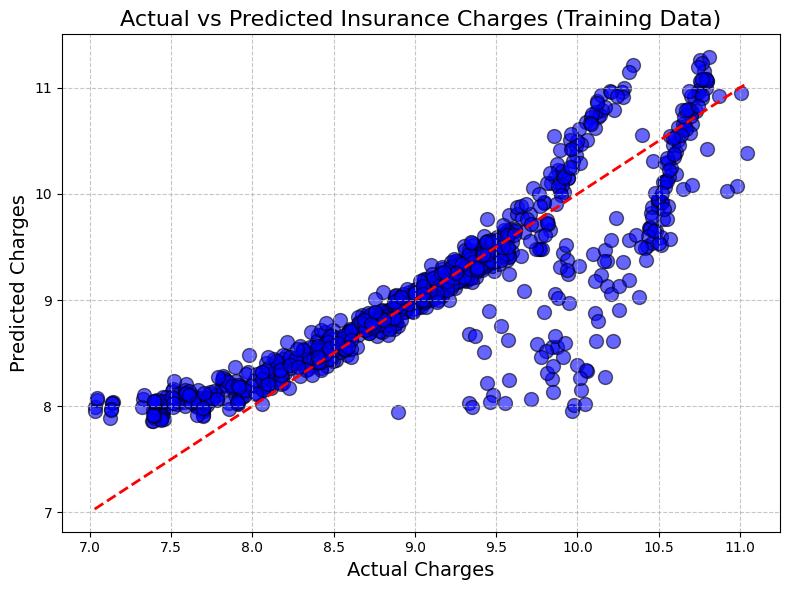

In [ ]:
y_train_values = y_train.values

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_hat, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Training Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_train_values), max(y_train_values)], [min(y_train_values), max(y_train_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred[0:10]


array([[9.51565766],
       [8.8220365 ],
       [8.98562647],
       [8.54514142],
       [8.60604493],
       [8.10211922],
       [8.25264898],
       [9.23189555],
       [9.70148565],
       [9.28222403]])

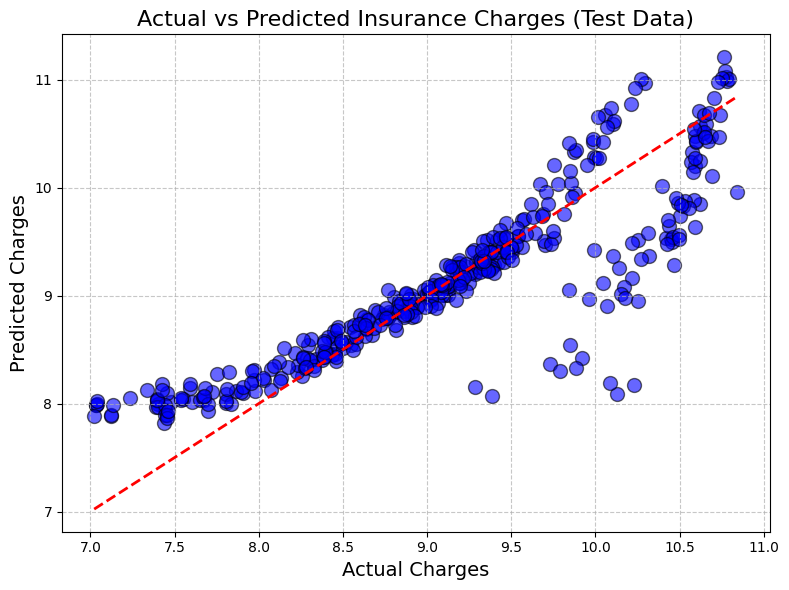

In [ ]:
plt.figure(figsize=(8, 6))

y_test_values = y_test.values

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Actual vs Predicted Insurance Charges (Test Data)', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coef':model.coef_[-1]})
coef_df

,Features,Coef
0,age,0.479923
1,bmi,0.057716
2,children,0.118673
3,smoker_yes,1.506928


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Training data
r2_train_log = round(r2_score(y_train, y_hat), 2)
mse_train_log = round(mean_squared_error(y_train, y_hat), 2)
mae_train_log = round(mean_absolute_error(y_train, y_hat), 2)
rmse_train_log = round(np.sqrt(mse_train_log), 2)

# Test data
r2_test_log = round(r2_score(y_test, y_pred), 2)
mse_test_log = round(mean_squared_error(y_test, y_pred), 2)
mae_test_log = round(mean_absolute_error(y_test, y_pred), 2)
rmse_test_log = round(np.sqrt(mse_test_log), 2)

# Print the metrics for log-transformed data
print(f"Training R² (log scale): {r2_train_log}")
print(f"Training MSE (log scale): {mse_train_log}")
print(f"Training MAE (log scale): {mae_train_log}")
print(f"Training RMSE (log scale): {rmse_train_log}")

print(f"\nTest R² (log scale): {r2_test_log}")
print(f"Test MSE (log scale): {mse_test_log}")
print(f"Test MAE (log scale): {mae_test_log}")
print(f"Test RMSE (log scale): {rmse_test_log}")


Training R² (log scale): 0.76
Training MSE (log scale): 0.2
Training MAE (log scale): 0.28
Training RMSE (log scale): 0.45

Test R² (log scale): 0.77
Test MSE (log scale): 0.21
Test MAE (log scale): 0.3
Test RMSE (log scale): 0.46


In [ ]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_ols).fit()

(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     724.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          5.89e-283
Time:                        08:05:17   Log-Likelihood:                -562.15
No. Observations:                 929   AIC:                             1134.
Df Residuals:                     924   BIC:                             1158.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0468      0.084     84.295      0.000       6.883       7.211
age            0.0341      0.001     32.574      0.000       0.032       0.036
bmi            0.0098      0.002      3.922      0.000       0.005       0.015
children       0.0977      0.012      8.130      0.000       0.074       0.121
smoker_yes     1.5069      0.037     40.850      0.000       1.435       1.579
==============================================================================
Omnibus:                      323.618   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.281
Skew:                           1.667   Prob(JB):                    2.73e-250
Kurtosis:                       7.311   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Density'>

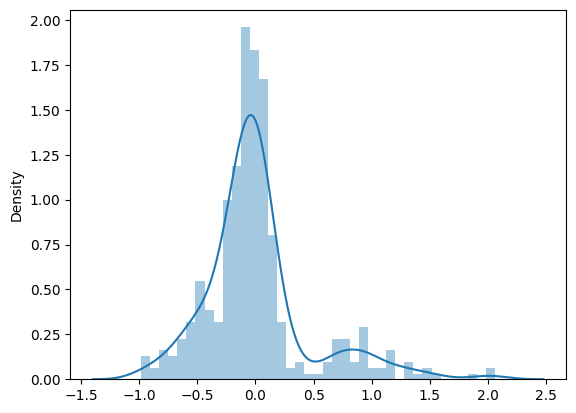

In [ ]:
sns.distplot(y_test - y_pred)


In [ ]:
review_df4 = pd.DataFrame({'Actual Value': np.reshape(np.exp(y_test.values), (y_test.size,)), 'Predicted Value': np.reshape(np.exp(y_pred), (y_pred.size,))})
review_df4['Residual'] = review_df4['Actual Value'] - review_df4['Predicted Value']
review_df4['Difference%'] = np.absolute(review_df4['Residual']/review_df4['Actual Value']*100)
review_df4.head()

,Actual Value,Predicted Value,Residual,Difference%
0,12265.50690,13570.555139,-1305.048239,10.639986
1,6282.23500,6782.062263,-499.827263,7.956201
2,6653.78860,7987.447086,-1333.658486,20.043596
3,18963.17192,5141.712211,13821.459709,72.885801
4,4747.05290,5464.593046,-717.540146,15.115487


In [ ]:
review_df4.describe(include='all')

,Actual Value,Predicted Value,Residual,Difference%
count,399.000000,399.000000,399.000000,399.000000
mean,13774.973849,12653.524184,1121.449665,28.511315
std,12401.569274,12382.950576,8036.636057,31.300311
min,1121.873900,2479.032716,-31334.178321,0.010542
25%,4742.660550,4925.298920,-1116.734693,6.164897
50%,9386.161300,8557.148677,-272.860066,14.933724
75%,18539.239850,13698.889285,924.495615,47.093073
max,51194.559140,73810.279841,30026.614596,167.402752


### Since both age and BMI have skewness values close to 0, indicating that they are nearly normally distributed, applying a log transformation would not provide any significant benefit. Log transformations are typically used to address skewed data, especially when it has a rightward skew. In this case, as the distributions of age and BMI are already close to normal, applying the log transformation is unnecessary and would not improve model performance.

In [ ]:
data['age'].skew()

0.057520907909550154

In [ ]:
data['bmi'].skew()

0.15714074884049561

## Final Conclusion :-

## Which Model is Best and Why?

### Best Model: Log-transformed model is slightly better based on:
- **Higher R-squared** (0.758 vs 0.750) and **Adjusted R-squared** (0.757 vs 0.749), indicating a better fit to the data.
- **Higher F-statistic** (724.0 vs 693.4) and very low p-values for the F-statistic in both models, confirming better overall statistical significance.
- **Residual analysis**: The log-transformed model shows a better percentage difference (28.51% vs 42.10%), reflecting better predictive accuracy.

### Not the Best Model: Non-log-transformed model:
- While it provides a good fit, it is slightly less robust and efficient in explaining the variance and predictions compared to the log-transformed values.

### Conclusion:
In summary, the log-transformed model is better because it provides a slightly better overall fit, more statistically significant results, and more consistent predictive performance.
